## Slike kockica

### U ovom primeru ce se koristiti samo date slike radi demonstracije, unapredjenje programa bi bilo da se napravi da radi za drugacije kockice, kao i kockice koje nisu skroz paralelne kameri vec se vide i tacke sa njihovih strana.

,,,,,

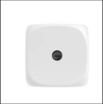
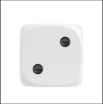
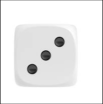
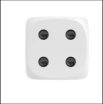
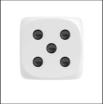
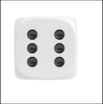

In [1]:
# Ucitavanje slike svih kockica i podela na pojedinacne kockice, kao i pretvaranje u grayscale
using Images
diceIm = load("kockice.jpg")
(h, w) = size(diceIm)
dice = []

for j in 0:1
    for i in 0:2
        push!(dice, Gray.(diceIm[j*h÷2+1:(j+1)*h÷2,i*w÷3+1:(i+1)*w÷3]))
        # za celobrojno deljenje se koristi ÷ (\div <enter>) 
    end
end
hcat.(dice)

## Slike u Juliji

### Slike u Juliji, kao i u drugim jezicima, se predstavljaju matricom brojeva (odnosno objektom RGB boje kod slika u boji).
### Kod grayscale slika matrice sadrze brojeve izmedju 0 i 1 gde je 0 crna boja, 1 bela i sve izmedju su nijanse sive.

#### Slike mogu da se adresiraju kao sve matrice: 
_slika[i, j]_ - daje vrednost _i_ od gornje ivice i _j_ od leve ivice.  
#### Moze se iseci deo slike koriscenjem opsega(range):

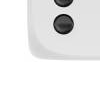

In [2]:
dice[6][100:200, 1:100]

## Resenje 1

### Binarizacija
#### Binarizacija je proces pri kom se grayscale slika pretvara u binarnu (crno belu) sliku gde su svi pikseli ili 0 ili 1.
#### Koji piksel postaje 0 a koji 1 se odredjuje na osnovu _threshold_ (granica). Svi pikseli veci od _threshold_ postaju 1, a svi manji postaju 0.



In [3]:
function binarize(im, thresh)
    im[im.>thresh] .= 1
    im[im.<=thresh] .= 0
    return im
end;

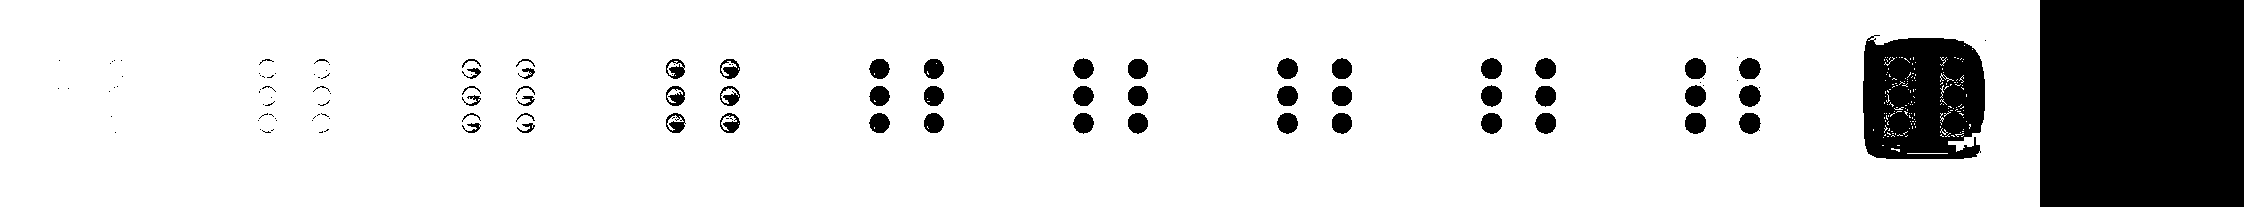

In [4]:
# Prikaz uticaja vrednosti threshold na rezultat binarizacije
thresholds = collect(0:0.1:1)
bins = []

for thr in thresholds
    push!(bins, binarize(copy(dice[6]), thr))
end

reduce(hcat, bins)

#### U krajnjem resenju bi bilo dobro da se uspostavi dinamicki threshold nekom heuristkom, ali cemo u ovom primeru izabrati threshold koji odgovara izabranim slikama

In [5]:
THRESH = 0.5;
NUM = 6

bin = binarize(copy(dice[NUM]), THRESH);

### Detekcija krugova

#### Krugovi se detektuju jednostavno brojenjem grupa povezanih crnih piksela - koliko ima grupa crnih piksela toliko ima tacaka, odnosno taj broj je pao pri bacanju kockice

In [6]:
function fillVisited(img, i, j, visited, w, h)
    visited[i, j] = 1
    for y = -1:1
        for x = -1:1
            if((y == 0 && x == 0) || i+y < 1 || j+x < 1 || i+y>h || j+x > w) 
                continue
            end
            if(img[i+y,j+x] == 0 && !visited[i+y, j+x]) 
                fillVisited(img, i+y, j+x, visited, w, h);
            end
        end
    end
end;

function countBlobs(img)
    (h, w) = size(img)
    visited = BitArray(undef, h, w)
    visited .= 0
    count = 0

    for i = 1:h
        for j = 1:w
            if img[i,j] == 0 && !visited[i, j]
                count+=1
                fillVisited(img, i, j, visited, w, h)
            end
        end
    end
    return count
end;


Die selected: 4
Die predicted: 4


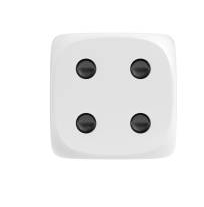

In [7]:
THRESH = 0.5;
NUM = rand(1:6)

bin = binarize(copy(dice[NUM]), THRESH);

n = countBlobs(bin)

println("Die selected: ", NUM, "\nDie predicted: ", n);
dice[NUM]

# Nije gotovo - treba parametri da se podese i da se detaljnije objasni kod

## Resenje 2

### Hough transformacija

#### Hough transformacija je algoritam za prepoznavanje geometrijskih oblika u slici. Algoritam pretvara sliku u prostor parametara. Za prepoznavanje krugova u prostoru parametara svaka tacka predstavlja krug nekog oblika. Svaki krug dobija parametre $(x, y, r)$ - polozaj kruga $x$,$y$ i poluprecnik kruga $r$. Tada se koristi algoritam za pretrazivanje tacaka u prostoru parametara kako bi se izdvojili trazeni krugovi.

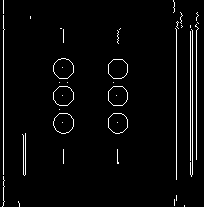

In [8]:
using ImageFeatures

img = bins[6];
img_edges = canny(img, (Percentile(99), Percentile(80)))
dx, dy=imgradients(img, KernelFactors.ando5);
img_phase = phase(dx, dy);
centers, radii = hough_circle_gradient(img_edges, img_phase, 10:15);
# img_demo .= 0.0;
img_demo = Float64.(img_edges)
for c in centers img_demo[c] = 1; end

Gray.(img_demo)